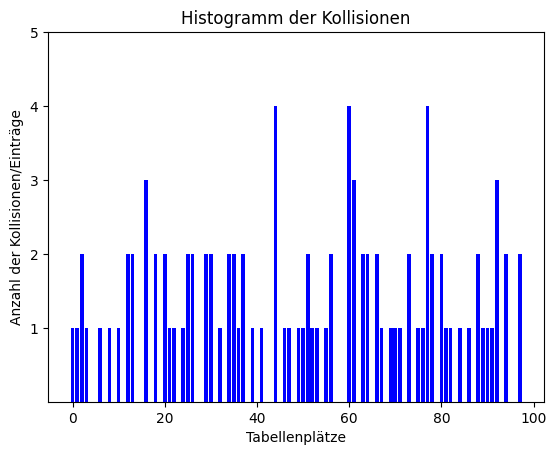

In [30]:
import csv
import matplotlib.pyplot as plt

def read_csv_file(file_path, num_rows):
    rows = []
    with open(file_path, 'r', encoding='ISO-8859-1') as file:
        csv_reader = csv.reader(file)
        for _ in range(num_rows):
            rows.append(next(csv_reader))
    return rows

def key_Wert(input_Wert):
    key = 0
    for buchstabe in input_Wert:
        key += ord(buchstabe)
    return key

def mid_square_hash(input_key: int, hashsize):
    squared = input_key * input_key
    str_squared = str(squared)
    length = len(str_squared)
    num_digits = len(str(hashsize))
    start = (length - num_digits) // 2
    end = start + num_digits
    mid_value = int(str_squared[start:end])
    return mid_value % hashsize

file_path = "/Users/furkan/Downloads/archive/de_DE.csv"

hashsize = int(input("Bitte geben Sie die gewünschte Hashgröße ein: "))
num_rows = int(input("Bitte geben Sie die Anzahl der Inputwerte ein: "))

rows = read_csv_file(file_path, num_rows)

hashliste = set()
collision_count = {i: 0 for i in range(hashsize)}

for row in rows:
    key = key_Wert(str(row))
    hashwert = mid_square_hash(key, hashsize)
    if hashwert in hashliste:
        collision_count[hashwert] += 1
    else:
        hashliste.add(hashwert)
        collision_count[hashwert] = 1 
        

used_slots = {k: v for k, v in collision_count.items() if v >= 1}

# Histogramm erstellen
plt.bar(used_slots.keys(), used_slots.values(), color='blue')
plt.xlabel('Tabellenplätze')
plt.ylabel('Anzahl der Kollisionen/Einträge')
plt.title('Histogramm der Kollisionen')
plt.yticks(range(1, 6))  
plt.show()
